In [41]:
import numpy as np

In [42]:
import pandas as pd
X = pd.read_csv('./Training Data/Logistic_X_Train.csv')
Y = pd.read_csv('./Training Data/Logistic_Y_Train.csv')
X = X.to_numpy()
Y = Y.to_numpy()
print(X.shape)
print(Y.shape)

(2250, 2)
(2250, 1)


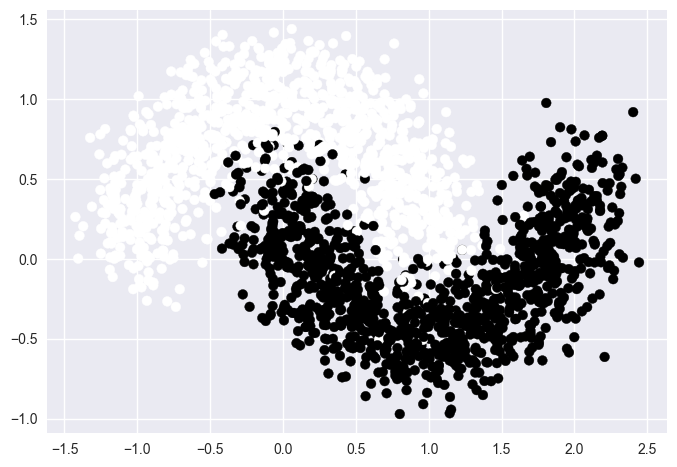

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [44]:

def softmax(z):
    # print(z)
    e_power_z = np.exp(z)
    ans = e_power_z/np.sum(e_power_z, axis=1, keepdims=True) # dont reduce the dimensions - keep it
    return ans


In [45]:
def sigmoid(x): 
    return 1.0/(1.0 + np.exp(-x))

In [46]:
softmax_test = np.array([[10, 10],
                         [20, 20]])
softmax(softmax_test)

array([[0.5, 0.5],
       [0.5, 0.5]])

In [47]:
# def relu(x):
#     if x > :
    #    // for vanishing gradient

In [48]:
class NeuralNetwork():
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))

        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))

        model['W3'] = np.random.randn(layers[1], layers[2])
        model['b3'] = np.zeros((1, layers[2]))

        model['W4'] = np.random.randn(layers[2], output_size)
        model['b4'] = np.zeros((1, output_size))

        self.model = model
    
    def forward(self, X):
        W1,W2,W3,W4 = self.model['W1'],self.model['W2'],self.model['W3'],self.model['W4']
        b1,b2,b3,b4 = self.model['b1'],self.model['b2'],self.model['b3'], self.model['b4']
        z1 = np.dot(X, W1) + b1
        a1 = np.tanh(z1) # - shape - m x num_neurons_layers[0]

        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2) # - shape - m x num_neurons_layers[1]

        z3 = np.dot(a2, W3) + b3
        a3 = np.tanh(z3) # - shape - m x num_neurons_layers[2]

        z4 = np.dot(a3, W4) + b4
        # Yhat = softmax(z4)
        Yhat = sigmoid(z4)
        self.activation_outputs = (a1, a2, a3, Yhat)
        # print(Yhat)
        return Yhat

    def backward(self, X, onehotVec_Y, learning_rate = 0.0001):
        
        # m examples, c classes
        W1,W2,W3,W4 = self.model['W1'],self.model['W2'],self.model['W3'],self.model['W4']
        a1, a2, a3, Yhat = self.activation_outputs

        delta4 = Yhat - onehotVec_Y # derivative of cross entropy Loss w.r.t. Yhat = activation fn, delta4 Shape - m x c
        # delta4 = m x c
        # a3 = m x num_neurons_layers[2] 
        # print(self.model['W4'].shape)
        # print(a3.T.shape)
        # print(delta4.shape)
        dw4 = np.dot(a3.T, delta4)# derivative of activation fn w.r.t w4, Shape - num_neurons_layers[2] x c
        db4 = np.sum(delta4, axis=0)

        # delta4 = m x c
        # dw4 = num_neurons_layers[2] x c
        # print((1 - np.square(a3)).shape)
        delta3 = (1 - np.square(a3)) * np.dot(delta4, W4.T) # derivative of cross entropy Loss w.r.t. activation fn a3, delta3 Shape - m x num_neurons_layers[2]
        # delta3 = m x num_neurons_layers[2]
        # a2 = m x num_neurons_layers[1]
        dw3 = np.dot(a2.T, delta3)# derivative of z w.r.t w3, Shape - num_neurons_layers[1] x num_neurons_layers[2]
        db3 = np.sum(delta3, axis=0)

        # delta3 = m x num_neurons_layers[2]
        # dw3 = num_neurons_layers[1] x num_neurons_layers[2]
        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T) # derivative of cross entropy Loss w.r.t. activation fn a2, delta2 Shape - m x num_neurons_layers[1]
        # delta2 = m x num_neurons_layers[1]
        # a1 = m x num_neurons_layers[0]
        dw2 = np.dot(a1.T, delta2)# derivative of z w.r.t w2, Shape - num_neurons_layers[0] x num_neurons_layers[1]
        db2 = np.sum(delta2, axis=0)

        # delta2 = m x num_neurons_layers[1]
        # dw2 = num_neurons_layers[0]] x num_neurons_layers[1]
        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T) # derivative of cross entropy Loss w.r.t. activation fn a1, delta1 Shape - m x num_neurons_layers[0]
        # delta1 = m x num_neurons_layers[0]
        # X = m x input_size
        dw1 = np.dot(X.T, delta1)# derivative of z w.r.t w1, Shape - input_size x num_neurons_layers[0]
        db1 = np.sum(delta1, axis=0)

        self.model['W1'] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1

        self.model['W2'] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2

        self.model['W3'] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3

        self.model['W4'] -= learning_rate * dw4
        self.model['b4'] -= learning_rate * db4

    def predict(self, X_test):
        Y_test = self.forward(X_test)
        return np.argmax(Y_test, axis=1)

    def summary(self):
        W1,W2,W3,W4 = self.model['W1'], self.model['W2'], self.model['W3'], self.model['W4']
        a1, a2, a3, Yhat = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)

        print("W3 ",W3.shape)
        print("A3 ",a3.shape)

        print("W4 ",W4.shape)
        print("Y_ ",Yhat.shape)

In [49]:
def loss(onehotVec_Y, Yhat_prob):
    return -np.mean(onehotVec_Y * np.log(Yhat_prob))

In [50]:
def one_hot(Y, num_classes):
    m = Y.shape[0]
    onehotVec_Y = np.zeros((m, num_classes))
    onehotVec_Y[np.arange(m), Y] = 1
    return onehotVec_Y

In [51]:
# model = NeuralNetwork(input_size=2, layers=[3,4,5], output_size=2)
model = NeuralNetwork(input_size=2, layers=[3,4,5], output_size=1)

In [52]:
# model.forward(X)

In [53]:
# model.summary()

In [54]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = Y
    # Y_OHT = one_hot(Y,classes)
    # print(Y_OHT.shape)
    for ix in range(epochs):
        Y_ = model.forward(X)
        # print(Y_)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        # print(l)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
        # if ix == 5:
        #     break
    return training_loss

In [55]:
train(X, Y, model, 1000)

Epoch 0 Loss 0.5090
Epoch 50 Loss 0.1472
Epoch 100 Loss 0.1195
Epoch 150 Loss 0.0918
Epoch 200 Loss 0.0698
Epoch 250 Loss 0.1188
Epoch 300 Loss 0.1256
Epoch 350 Loss 0.1156
Epoch 400 Loss 0.1064
Epoch 450 Loss 0.0974
Epoch 500 Loss 0.0902
Epoch 550 Loss 0.0853
Epoch 600 Loss 0.0821
Epoch 650 Loss 0.0797
Epoch 700 Loss 0.0779
Epoch 750 Loss 0.0764
Epoch 800 Loss 0.0752
Epoch 850 Loss 0.0742
Epoch 900 Loss 0.0734
Epoch 950 Loss 0.0727


[0.5090261279480567,
 0.2520090718793851,
 0.19491328175110578,
 0.18314552079903115,
 0.17845066272020954,
 0.17610032687318497,
 0.17473964505671696,
 0.17382830403572366,
 0.17311916014463238,
 0.17249280183451082,
 0.17189111711149138,
 0.1712869128382359,
 0.17066893392361454,
 0.1700341304561927,
 0.1693835514233417,
 0.16872012878244438,
 0.1680474761562004,
 0.16736924437616804,
 0.16668878792725209,
 0.16600900707588964,
 0.16533228978271752,
 0.16466050996584428,
 0.16399505681742227,
 0.16333688022259038,
 0.16268654336558838,
 0.16204427721519207,
 0.16141003379306498,
 0.1607835365168367,
 0.1601643267948615,
 0.15955180661194718,
 0.15894527718774573,
 0.15834397397283176,
 0.15774709831082864,
 0.15715384606705746,
 0.15656343342990697,
 0.15597511995463895,
 0.1553882287655305,
 0.1548021636867049,
 0.15421642295989427,
 0.15363060915140284,
 0.1530444348680122,
 0.1524577240012526,
 0.15187040839881044,
 0.15128252010550391,
 0.1506941795968019,
 0.15010558070896143,
 

In [56]:
model.summary()

W1  (2, 3)
A1  (2250, 3)
W2  (3, 4)
A2  (2250, 4)
W3  (4, 5)
A3  (2250, 5)
W4  (5, 1)
Y_  (2250, 1)


/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_2280/1639072181.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


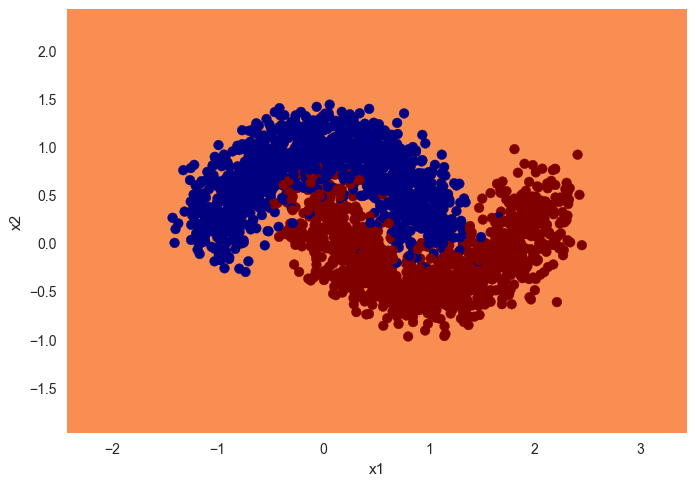

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plot_decision_boundary(lambda x:model.predict(x),X,Y)